# Práctica Final

## Laboratorio de Probabilidad y Estadística en Python

Caso a resolver: Alturas y pesos de personas para estimar si es hombre o mujer.

### Preparación de la base de datos:

In [167]:
import pandas as pd
import numpy as np
from helper import visualize_input, plot_images
from matplotlib import pyplot as plt

In [4]:
#Se importa la base de datos de alturas y pesos de las personas. 
df = pd.read_csv('alturas-pesos.csv')

In [6]:
alturas = df['Altura'].values
pesos = df['Peso'].values
clases = df['Sexo'].values

In [8]:
print(alturas)

[187 174 188 ... 162 175 157]


In [10]:
print(pesos)

[109  73  96 ...  58  74  51]


In [12]:
print(clases)

['Hombre' 'Hombre' 'Hombre' ... 'Mujer' 'Mujer' 'Mujer']


In [104]:
len(df)  #Cantidad de registros en la muestra.

10000

In [105]:
print(df)

        Sexo  Peso  Altura
0     Hombre   109     187
1     Hombre    73     174
2     Hombre    96     188
3     Hombre    99     182
4     Hombre    93     177
5     Hombre    69     170
6     Hombre    83     174
7     Hombre    76     173
8     Hombre    79     170
9     Hombre    70     161
10    Hombre    84     180
11    Hombre    96     181
12    Hombre    75     164
13    Hombre    85     175
14    Hombre    84     175
15    Hombre    78     171
16    Hombre    88     183
17    Hombre    78     162
18    Hombre    84     176
19    Hombre    82     172
20    Hombre    78     172
21    Hombre    89     176
22    Hombre    67     168
23    Hombre   103     191
24    Hombre    73     172
25    Hombre    87     173
26    Hombre    83     175
27    Hombre    93     184
28    Hombre    79     171
29    Hombre    70     173
...      ...   ...     ...
9970   Mujer    68     166
9971   Mujer    70     164
9972   Mujer    55     154
9973   Mujer    54     154
9974   Mujer    64     166
9

##### Al tratarse de distribuciones de pesos y alturas de las personas, este caso debiera resolverse mediante el uso de Naive Bayes Gaussiano. 
Esto se debe a que los datos que se utilizan son del tipo contínuo. 
Lo que se quiere hacer es, a partir de los datos con los que se cuenta de pesos y alturas de personas, crear un clasificador de Naive Bayes para nuevas mediciones que se quieran incorporar.

### Análisis datos:

Se efectúa un análisis básico de los datos previo a realizar el clasificador para ver como se comportan. Esto implica calcular los estadísticos descriptivos básicos para la muestra a utilizar.

In [17]:
print(df)

        Sexo  Peso  Altura
0     Hombre   109     187
1     Hombre    73     174
2     Hombre    96     188
3     Hombre    99     182
4     Hombre    93     177
5     Hombre    69     170
6     Hombre    83     174
7     Hombre    76     173
8     Hombre    79     170
9     Hombre    70     161
10    Hombre    84     180
11    Hombre    96     181
12    Hombre    75     164
13    Hombre    85     175
14    Hombre    84     175
15    Hombre    78     171
16    Hombre    88     183
17    Hombre    78     162
18    Hombre    84     176
19    Hombre    82     172
20    Hombre    78     172
21    Hombre    89     176
22    Hombre    67     168
23    Hombre   103     191
24    Hombre    73     172
25    Hombre    87     173
26    Hombre    83     175
27    Hombre    93     184
28    Hombre    79     171
29    Hombre    70     173
...      ...   ...     ...
9970   Mujer    68     166
9971   Mujer    70     164
9972   Mujer    55     154
9973   Mujer    54     154
9974   Mujer    64     166
9

In [46]:
df_a=np.array(df)  #Para convertirlo a matriz.
print(df_a)

[['Hombre' 109 187]
 ['Hombre' 73 174]
 ['Hombre' 96 188]
 ...
 ['Mujer' 58 162]
 ['Mujer' 74 175]
 ['Mujer' 51 157]]


#### Cálculo de medias:

Se calculan las medias para el total de la muestra y para las distintas categorías (hombre/mujer) por separado.

In [22]:
mean_alturas=np.mean(alturas)
print(mean_alturas)

168.0733


In [24]:
mean_pesos=np.mean(pesos)
print(mean_pesos)

72.7339


In [26]:
pd.value_counts(clases)

Hombre    5000
Mujer     5000
dtype: int64

Puede observarse que hay la misma cantidad de mujeres que de hombres en esta muestra. 

In [47]:
data_means = df.groupby('Sexo').mean()
print(data_means)

           Peso    Altura
Sexo                     
Hombre  84.3430  174.8230
Mujer   61.1248  161.3236


#### Cálculo de varianzas:

Se calculan las varianzas para el total de la muestra y para las distintas categorías (hombre/mujer) por separado.

In [37]:
var_alturas=np.var(alturas)
print(var_alturas)

95.54632711000001


In [35]:
var_pesos=np.var(pesos)
print(var_pesos)

212.32789079


In [92]:
data_vars = df.groupby('Sexo').var()
print(data_vars)

             Peso     Altura
Sexo                        
Hombre  80.611473  52.859843
Mujer   74.532932  47.135910


#### Histogramas:

En primer lugar se llevan adelante los histogramas para la totalidad de los datos de la muestra, para posteriormente calcularlos para hombres y mujeres por separado.

Text(0,0.5,'Frecuencia')

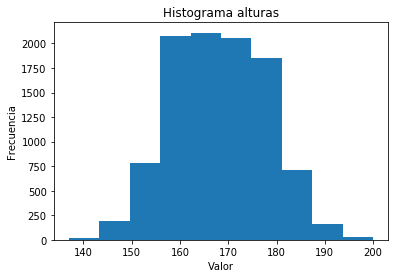

In [43]:
plt.hist(alturas)
plt.title("Histograma alturas")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

Text(0,0.5,'Frecuencia')

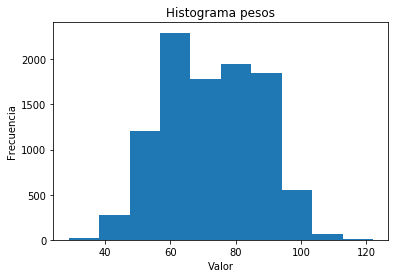

In [45]:
plt.hist(pesos)
plt.title("Histograma pesos")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

A partir de los histogramas, sin realizar la distinción por sexo, puede observarse que las distribuciones de las alturas y los pesos por separado se aproximan a una distribución normal. 

In [60]:
hombres = df_a[clases == 'Hombre']
mujeres = df_a[clases == 'Mujer']

print(hombres)
print(mujeres)

[['Hombre' 109 187]
 ['Hombre' 73 174]
 ['Hombre' 96 188]
 ...
 ['Hombre' 90 170]
 ['Hombre' 84 181]
 ['Hombre' 90 178]]
[['Mujer' 46 149]
 ['Mujer' 64 165]
 ['Mujer' 59 160]
 ...
 ['Mujer' 58 162]
 ['Mujer' 74 175]
 ['Mujer' 51 157]]


In [140]:
df.dtypes

Sexo      object
Peso       int64
Altura     int64
dtype: object

#### Análisis por categorías:

A continuación se trabaja con la base para poder calcular los estadísticos de las variables y los histogramas según las distintas clases.

In [131]:
GNB_features_matrix = np.zeros((len(df),2))
GNB_labels = np.empty((len(df)), dtype=object)
print('Matriz y lista antes de llenar')
print(GNB_features_matrix)
print(GNB_labels)

Matriz y lista antes de llenar
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[None None None ... None None None]


In [136]:
for i in range(len(df)):
    GNB_features_matrix[i, 0] = df['Altura'][i]
    GNB_features_matrix[i, 1] = df['Peso'][i]
    GNB_labels[i] = df['Sexo'][i]
print()
print('Matriz y lista con los datos:')
print(GNB_features_matrix)
print(GNB_labels)


Matriz y lista con los datos:
[[187. 109.]
 [174.  73.]
 [188.  96.]
 ...
 [162.  58.]
 [175.  74.]
 [157.  51.]]
['Hombre' 'Hombre' 'Hombre' ... 'Mujer' 'Mujer' 'Mujer']


In [166]:
men_means = GNB_features_matrix[GNB_labels=='Hombre',:].mean(axis=0)
women_means = GNB_features_matrix[GNB_labels=='Mujer',:].mean(axis=0)
men_vars = GNB_features_matrix[GNB_labels=='Hombre',:].var(axis=0, ddof=1)
women_vars = GNB_features_matrix[GNB_labels=='Mujer',:].var(axis=0, ddof=1)
print('medias de los hombres:', men_means)
print('varianzas de los hombres:', men_vars)
print('medias de las mujeres:', women_means)
print('varianzas de las mujeres:', women_vars)

medias de los hombres: [174.823  84.343]
varianzas de los hombres: [52.85984297 80.61147329]
medias de las mujeres: [161.3236  61.1248]
varianzas de las mujeres: [47.13591022 74.53293155]


In [ ]:
plt.hist(pesos)
plt.title("Histograma pesos")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

In [142]:
def gaussian(x, mu, sig):
    return np.exp(-np.power((x - mu)/sig, 2.)/2)/(np.sqrt(2.*np.pi)*sig)

def plot_gaussian(mu=0, sig= 1, points = 200, N = 2, marker=None, label = None, x = None, color = None, 
                  x_label='',y_label='',ax = None, figsize = (20,10), center_label_tick = None):
    if ax is None:
        f, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize = figsize)
    if x is None:
        x = np.linspace(mu-N*sig, mu+N*sig, points)
    y = gaussian(x, mu, sig)
    ax.plot(x,y, marker = marker, label = label, color = color)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)

    if center_label_tick is not None:
        labels = [item.get_text() for item in ax.get_xticklabels()]
        labels[int((len(labels)-1)/2)] = center_label_tick
        ax.set_xticklabels(labels)

    return x, y

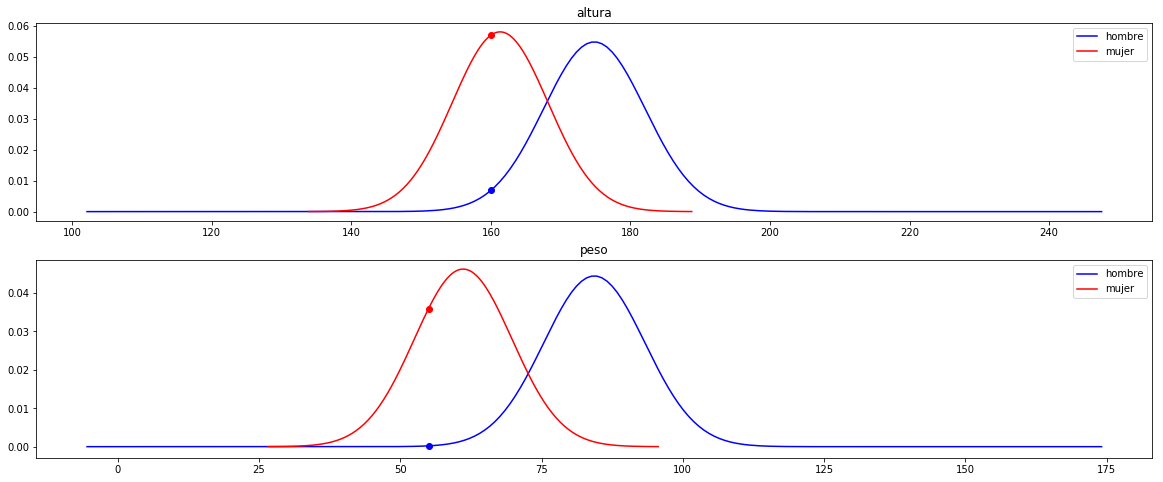

In [155]:
sample = np.array([160,55])

f, axs = plt.subplots(2, 1, sharey=False, sharex=False, figsize = (20,8))
keys = ['altura', 'peso']
for i, ax in enumerate(axs):
    plot_gaussian(men_means[i], np.sqrt(men_vars[i]), ax=ax, N=10, color='b', label='hombre')
    plot_gaussian(women_means[i], np.sqrt(women_vars[i]), ax=ax, N=4, color='r', label='mujer')
    ax.scatter(sample[i], gaussian(sample[i], men_means[i], np.sqrt(men_vars[i])), color='b')
    ax.scatter(sample[i], gaussian(sample[i], women_means[i], np.sqrt(women_vars[i])), color='r')
    ax.title.set_text(keys[i])
    ax.legend()
plt.show()

In [156]:
p_hombre = len(GNB_features_matrix[GNB_labels=='Hombre',:])/len(GNB_features_matrix)
p_altura_hombre = gaussian(sample[0], men_means[0], np.sqrt(men_vars[0]))
p_peso_hombre = gaussian(sample[1], men_means[1], np.sqrt(men_vars[1]))
posterior_hombre = p_hombre*p_altura_hombre*p_peso_hombre
print('Posteriori de hombre:', posterior_hombre)

Posteriori de hombre: 7.31251297279173e-07


In [157]:
p_mujer = len(GNB_features_matrix[GNB_labels=='Hombre',:])/len(GNB_features_matrix)
p_altura_mujer = gaussian(sample[0], women_means[0], np.sqrt(women_vars[0]))
p_peso_mujer = gaussian(sample[1], women_means[1], np.sqrt(women_vars[1]))
posterior_mujer = p_mujer*p_altura_mujer*p_peso_mujer
print('Posteriori de Mujer:', posterior_mujer)

Posteriori de Mujer: 0.0010246532083443985


In [159]:
if posterior_mujer>posterior_hombre:
    print('Mujer')
else:
    print('Hombre')

Mujer


#### Usando sklearn:

In [161]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(GNB_features_matrix, GNB_labels)

In [165]:
samples = np.array([[180,90], [160, 70], [168, 63], [178, 74]])
print(y_pred.predict(samples))
print(y_pred.predict_proba(samples))

['Hombre' 'Mujer' 'Mujer' 'Hombre']
[[9.99841029e-01 1.58971186e-04]
 [5.19360037e-02 9.48063996e-01]
 [5.38389773e-02 9.46161023e-01]
 [9.61104849e-01 3.88951514e-02]]
